<h3>Leitura de Imagem</h3>

In [1]:
%matplotlib inline

In [2]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
from scipy import fftpack

In [3]:
def generateFilter(image,w,h, filtType):
    if w > 0.5 or h > 0.5:
        print("w and h must be < 0.5")
        exit()
    m = np.size(image,0)
    n = np.size(image,1)
    LPF = np.zeros((m,n))
    HPF = np.ones((m,n))
    xi = np.round((0.5 - w/2) * m)
    xf = np.round((0.5 + w/2) * m)
    yi = np.round((0.5 - h/2) * n)
    yf = np.round((0.5 + h/2) * n)
    LPF[int(xi):int(xf),int(yi):int(yf)] = 1
    HPF[int(xi):int(xf),int(yi):int(yf)] = 0
    if filtType == "LPF":
        return LPF
    elif filtType == "HPF":
        return HPF
    else:
        print("Only Ideal LPF and HPF are supported")
        exit()

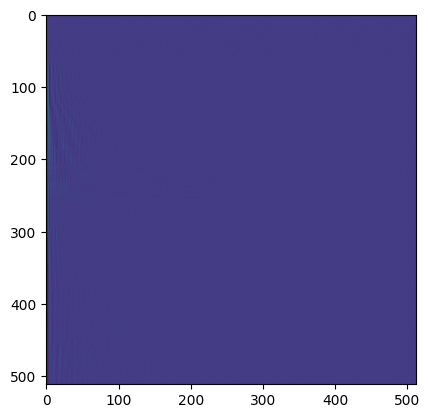

In [4]:
camera = data.camera()
ar = np.array(camera)
FT = fftpack.dct(ar)
#FT = fftpack.fftshift(FT)
plt.imshow(FT)

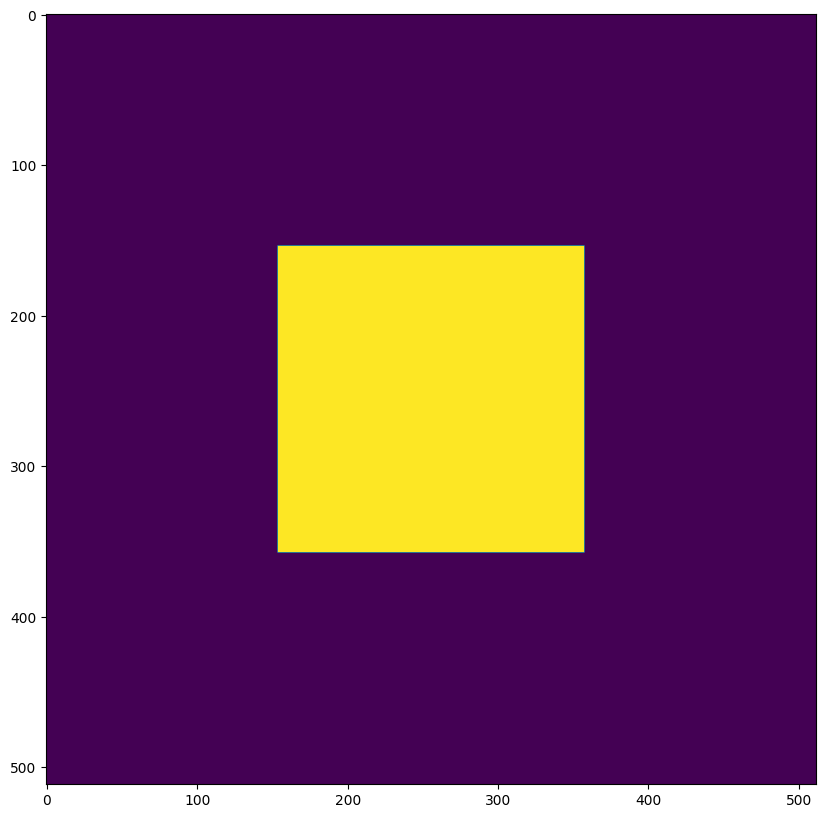

In [5]:
LPF = generateFilter(FT,0.4, 0.4, "LPF")
plt.figure("Ideal Low Pass Filter in frequency domain", figsize=(10,10))
plt.imshow(LPF)

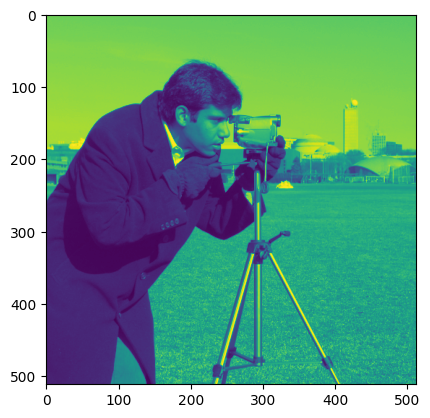

In [6]:
reverse = np.abs(fftpack.idct(FT))
plt.imshow(reverse)

<h3>Filtro passa-baixa - Exemplo de medida de qualidade</h3>

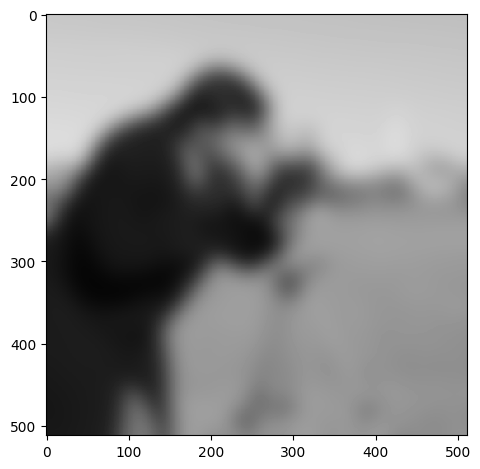

In [7]:
# application of Gaussian filter to the image
import skimage.filters as filter
res_image = filter.gaussian(camera, [13,13])
io.imshow(res_image);

In [8]:
# RMSE obtained with the Gaussian filter
from skimage import util
from math import sqrt
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
res_image = util.img_as_ubyte(res_image)
mse = mean_squared_error(res_image,camera)
print('rmse: %f'% sqrt(mse))

rmse: 25.815930


<h3> Filtro Passa-alta</h3>

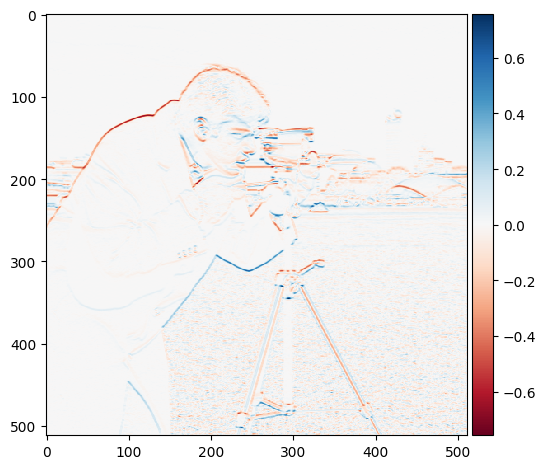

In [9]:
# application of prewitt filter to the image to detect horizontal edges
import skimage.filters as filter
res_image = filter.prewitt_h(camera)
io.imshow(res_image);

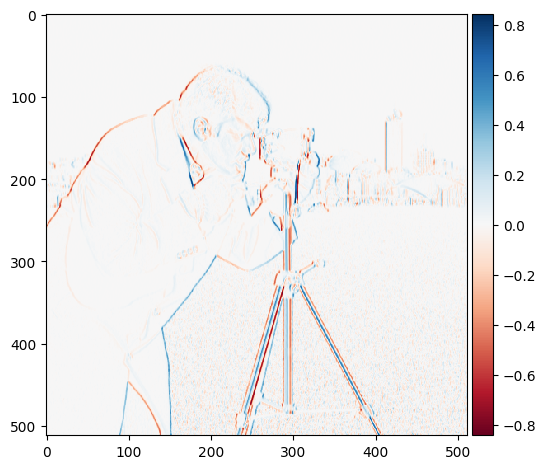

In [10]:
# application of prewitt filter to the image to detect vertical edges
import skimage.filters as filter
res_image = filter.prewitt_v(camera)
io.imshow(res_image);

<h3>Ruído Sal e Pimenta</h3>

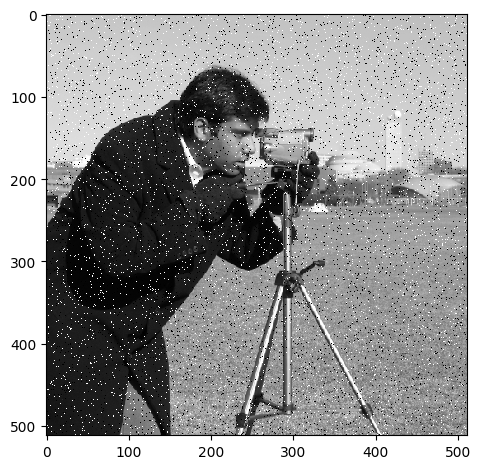

In [11]:
# add salt-and-pepper noise to the camera image
import skimage.util as util
imsp = util.random_noise(camera, mode='s&p')
imsp = util.img_as_ubyte(imsp)
io.imshow(imsp)

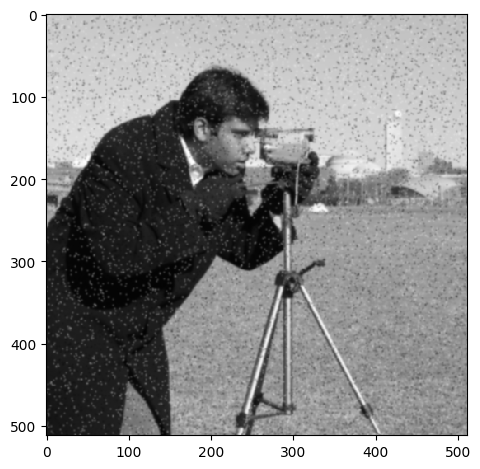

In [12]:
# apply Gaussian filter to the noisy image
import skimage.filters as filter
import skimage.util as util
noise_gaussian = filter.gaussian(imsp, 1)
noise_gaussian = util.img_as_ubyte(noise_gaussian)
io.imshow(noise_gaussian);

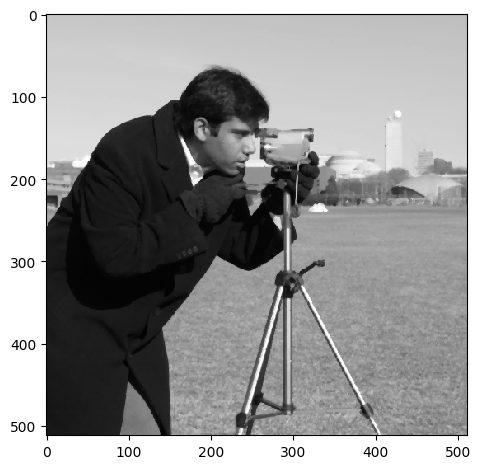

In [13]:
# apply the median filter to the noisy image
import skimage.filters as filter
from skimage.morphology import rectangle
from skimage.filters.rank import median
noise_median = median(imsp, rectangle(3,3))
io.imshow(noise_median);

In [14]:
# RMSE between corrupted and original image
from math import sqrt
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(imsp,camera)
print('rmse: %f'% sqrt(mse))

rmse: 32.952399


In [15]:
# RMSE betwee restaured with median and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_median,camera)
print('rmse: %f'% sqrt(mse))

rmse: 7.927573


In [16]:
# RMSE betwee restaured with Gaussian and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_gaussian,camera)
print('rmse: %f'% sqrt(mse))

rmse: 13.276871


<h3>Ruído Gaussiano</h3>

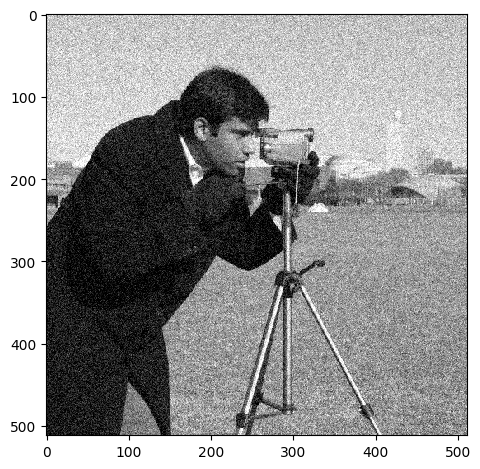

In [17]:
# add Gaussian noise to the camera image
import skimage.util as util
imGauss = util.random_noise(camera, mode='gaussian')
imGauss = util.img_as_ubyte(imGauss)
io.imshow(imGauss)

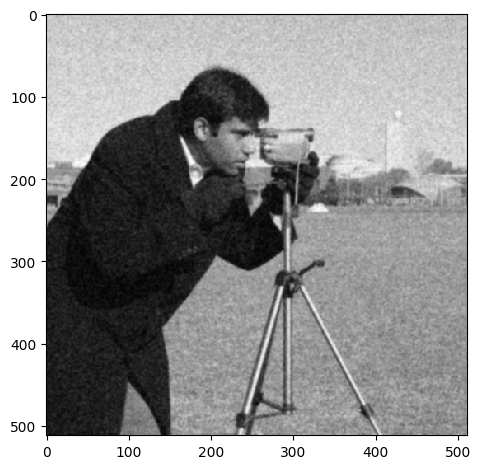

In [18]:
# apply Gaussian filter to the noisy image
import skimage.filters as filter
import skimage.util as util
noise_gaussian = filter.gaussian(imGauss, 1)
noise_gaussian = util.img_as_ubyte(noise_gaussian)
io.imshow(noise_gaussian);

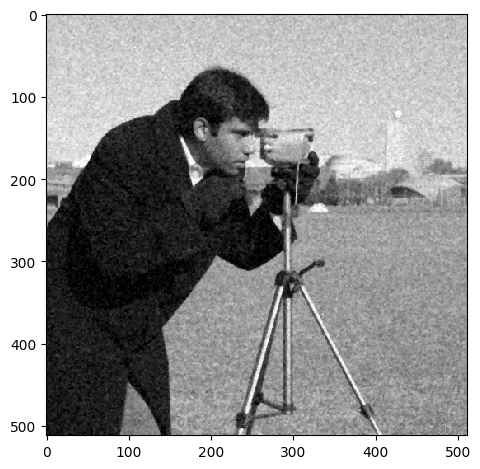

In [19]:
# apply the median filter to the noisy image
import skimage.filters as filter
from skimage.morphology import rectangle
from skimage.filters.rank import median
noise_median = median(imGauss, rectangle(3,3))
io.imshow(noise_median);

In [20]:
# RMSE between corrupted and original image
from math import sqrt
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(imGauss,camera)
print('rmse: %f'% sqrt(mse))

rmse: 24.256482


In [21]:
# RMSE betwee restaured with median and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_median,camera)
print('rmse: %f'% sqrt(mse))

rmse: 13.185876


In [22]:
# RMSE betwee restaured with Gaussian and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_gaussian,camera)
print('rmse: %f'% sqrt(mse))

rmse: 11.160233


<h3>Entropia Local </h3>

/home/bdlemos/.local/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


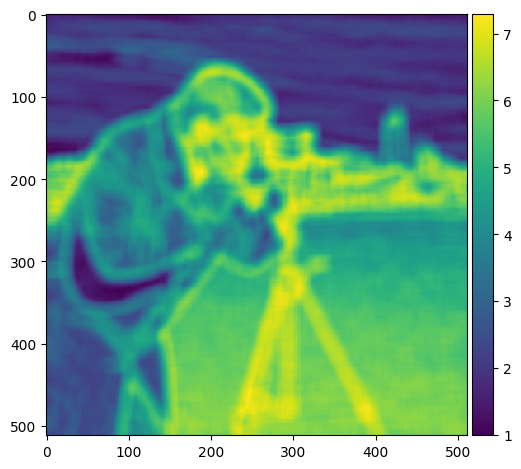

In [23]:
from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import rectangle
img = data.camera()
ent = entropy(img, rectangle(20,20))
io.imshow(ent);

<h3>Teste da OpenCV</h3>

In [24]:
import cv2
cv2.__version__

ModuleNotFoundError: No module named 'cv2'